Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score
warnings.filterwarnings('ignore')

Data collection and Analysis


In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv("/content/diabetes.csv")

In [ ]:
# Printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Checking any rows are duplicated or not
print(diabetes_dataset.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool


In [ ]:
# number of rows and column in the dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# getting info about the dataset
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# check if there any missing value have or not
diabetes_dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: >

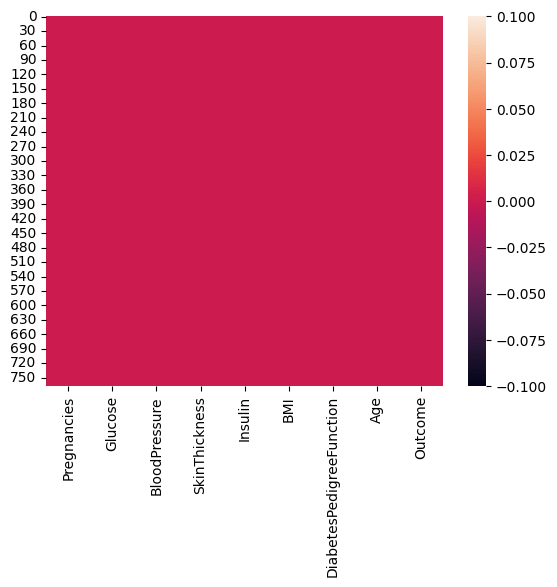

In [ ]:
sns.heatmap(diabetes_dataset.isnull(), cbar=True)

In [ ]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


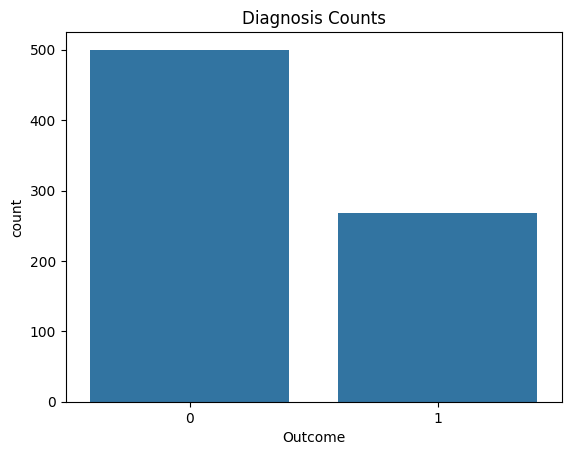

In [ ]:
sns.countplot(x='Outcome', data=diabetes_dataset)
plt.title('Diagnosis Counts')
plt.show()

0----> Non-diabetic people
1----> Diabetic

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Splitting the features and the outcome

In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [ ]:
#Splitiing the data into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


**Model comparison**

In [ ]:
Models = {
    "Logistic Regression" : LogisticRegression(),
    "Support Vector Machine" : SVC(),
    "K-Nearest Neighbors" : KNeighborsClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "AdaBoost" : AdaBoostClassifier(),
    "Gradient Boosting" : GradientBoostingClassifier(),
    "Decision Tree" : DecisionTreeClassifier()
}

for i in range (len(Models)):
  Model = list(Models.values())[i]
  Model.fit(X_train, Y_train)  # Train the model

  #Make Prediction
  Y_train_pred = Model.predict(X_train)
  Y_test_pred = Model.predict(X_test)

  # Training set performance
  Model_train_accuracy = accuracy_score(Y_train, Y_train_pred)*100
  Model_train_f1 = f1_score(Y_train, Y_train_pred,average = "weighted")*100
  Model_train_precision = precision_score(Y_train, Y_train_pred)*100
  Model_train_recall = recall_score(Y_train, Y_train_pred)*100
  Model_train_roc_auc = roc_auc_score(Y_train, Y_train_pred)*100

  # Test set performance
  Model_test_accuracy = accuracy_score(Y_test, Y_test_pred)*100
  Model_test_f1 = f1_score(Y_test, Y_test_pred,average = "weighted")*100
  Model_test_precision = precision_score(Y_test, Y_test_pred)*100
  Model_test_recall = recall_score(Y_test, Y_test_pred)*100
  Model_test_roc_auc = roc_auc_score(Y_test, Y_test_pred)*100

  print(list(Models.keys())[i])

  print("Model performance for Training set")
  print("--Accuracy:{:.4f}".format(Model_train_accuracy))
  print("--F1 Score:{:.4f}".format(Model_train_f1))
  print("--Precision:{:.4f}".format(Model_train_precision))
  print("--Recall:{:.4f}".format(Model_train_recall))
  print("--Roc Auc Score:{:.4f}".format(Model_train_roc_auc))
  print(".............................................")
  print("Model performance for Test set")
  print("--Accuracy:{:.4f}".format(Model_test_accuracy))
  print("--F1 Score:{:.4f}".format(Model_test_f1))
  print("--Precision:{:.4f}".format(Model_test_precision))
  print("--Recall:{:.4f}".format(Model_test_recall))
  print("--Roc Auc Score:{:.4f}".format(Model_test_roc_auc))
  print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, Y_test_pred)}\n")
  print(f"Classification Report :- \n {classification_report(Y_test, Y_test_pred)}")
  print('='*35)
  print('\n')

Logistic Regression
Model performance for Training set
--Accuracy:78.5016
--F1 Score:77.7917
--Precision:74.4048
--Recall:58.4112
--Roc Auc Score:73.8306
.............................................
Model performance for Test set
--Accuracy:75.3247
--F1 Score:74.2943
--Precision:70.0000
--Recall:51.8519
--Roc Auc Score:69.9259
Confusion Matrix :- 
[[88 12]
 [26 28]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       100
           1       0.70      0.52      0.60        54

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



Support Vector Machine
Model performance for Training set
--Accuracy:76.3844
--F1 Score:75.0525
--Precision:73.7931
--Recall:50.0000
--Roc Auc Score:70.2500
.............................................
Model performance for Test set
--Accuracy:78.5714
--F1 Score:76.7773
-

We will apply GridsearchCV method for hyperparameter tuning

In [ ]:
# list of models
models_list = [LogisticRegression(), SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state=0), AdaBoostClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier()]

In [ ]:
#creating a dictionary that contains hyperparameter values for the above mentioned models

model_hyperparameters = {
    'log_reg_hyperparameters': {
        'C' : [1,5,10,20],
        'max_iter' : [1000,5000,10000],
        'penalty':['l1', 'l2', 'elasticnet', None],
        'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
    },
    'svc_hyperparameters': {
        'kernel' : ['linear', 'poly', 'rbf' , 'sigmoid'],
        'C' : [1,5,10,20]
    },
    'KNN_hyperparameters': {
        'n_neighbors' : [3,5,10]
    },
    'random_forest_hyperparameters' : {
        "max_depth" :[5,8,15,None,50,100],
        "max_features" : [5,8,15,None,"auto"],
        "min_samples_split" : [2,8,15,20],
        "n_estimators" : [10, 20,50,100]
    },
    'AdaBoost_hyperparameters' : {
        'n_estimators' : [10, 20,50,100],
        'learning_rate' : [0.001, 0.01, 0.1],
    },
    'GradientBoosting_hyperparameters' : {
        'n_estimators' : [10, 20,50,100],
        'learning_rate' : [0.001, 0.01],
    },
    'DecisionTree_hyperparameters' : {
        'criterion' : ['gini', 'entropy'],
        'splitter' : ['best', 'random']
    }
}

In [ ]:
model_keys = list(model_hyperparameters.keys())
print(model_keys)

['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters', 'AdaBoost_hyperparameters', 'GradientBoosting_hyperparameters', 'DecisionTree_hyperparameters']


In [ ]:
print(model_hyperparameters)

{'log_reg_hyperparameters': {'C': [1, 5, 10, 20], 'max_iter': [1000, 5000, 10000], 'penalty': ['l1', 'l2', 'elasticnet', None], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}, 'svc_hyperparameters': {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}, 'KNN_hyperparameters': {'n_neighbors': [3, 5, 10]}, 'random_forest_hyperparameters': {'max_depth': [5, 8, 15, None, 50, 100], 'max_features': [5, 8, 15, None, 'auto'], 'min_samples_split': [2, 8, 15, 20], 'n_estimators': [10, 20, 50, 100]}, 'AdaBoost_hyperparameters': {'n_estimators': [10, 20, 50, 100], 'learning_rate': [0.001, 0.01, 0.1]}, 'GradientBoosting_hyperparameters': {'n_estimators': [10, 20, 50, 100], 'learning_rate': [0.001, 0.01]}, 'DecisionTree_hyperparameters': {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']}}


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def ModelSelection(list_of_models, model_hyperparameters):
  model_param = {}
  i=0
  for model in list_of_models:
    key = model_keys[i]
    params = model_hyperparameters[key]
    i+=1

    classifier = GridSearchCV(model, params, cv=5)
    # fitting the data to classifier
    classifier.fit(X_train,Y_train)
    model_param[model] = classifier.best_params_
  for model_name in model_param:
    print(f"----Best params for {model_name}----")
    print(model_param[model_name])


In [ ]:
ModelSelection(models_list, model_hyperparameters)

----Best params for LogisticRegression()----
{'C': 5, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
----Best params for SVC()----
{'C': 1, 'kernel': 'linear'}
----Best params for KNeighborsClassifier()----
{'n_neighbors': 10}
----Best params for RandomForestClassifier(random_state=0)----
{'max_depth': 15, 'max_features': 5, 'min_samples_split': 8, 'n_estimators': 100}
----Best params for AdaBoostClassifier()----
{'learning_rate': 0.1, 'n_estimators': 100}
----Best params for GradientBoostingClassifier()----
{'learning_rate': 0.01, 'n_estimators': 100}
----Best params for DecisionTreeClassifier()----
{'criterion': 'entropy', 'splitter': 'best'}


Now we will apply best hyperparameters on all models and check evaluation report

In [ ]:
Models = {
    "Logistic Regression" : LogisticRegression(C= 5, max_iter= 1000, penalty= 'l2', solver= 'lbfgs'),
    "Support Vector Machine" : SVC(C= 1, kernel= 'linear'),
    "K-Nearest Neighbors" : KNeighborsClassifier(n_neighbors = 10),
    "AdaBoost" : AdaBoostClassifier(learning_rate= 0.1, n_estimators= 100),
    "Random Forest" : RandomForestClassifier(max_depth= 15, max_features= 5, min_samples_split= 8, n_estimators= 100),
    "Gradient Boosting" : GradientBoostingClassifier(learning_rate = 0.01, n_estimators= 100),
    "Decision Tree" : DecisionTreeClassifier(criterion= 'entropy', splitter= 'best')
}

for i in range (len(Models)):
  Model = list(Models.values())[i]
  Model.fit(X_train, Y_train)  # Train the model

  #Make Prediction
  Y_train_pred = Model.predict(X_train)
  Y_test_pred = Model.predict(X_test)

  # Training set performance
  Model_train_accuracy = accuracy_score(Y_train, Y_train_pred)*100
  Model_train_f1 = f1_score(Y_train, Y_train_pred,average = "weighted")*100
  Model_train_precision = precision_score(Y_train, Y_train_pred)*100
  Model_train_recall = recall_score(Y_train, Y_train_pred)*100
  Model_train_roc_auc = roc_auc_score(Y_train, Y_train_pred)*100

  # Test set performance
  Model_test_accuracy = accuracy_score(Y_test, Y_test_pred)*100
  Model_test_f1 = f1_score(Y_test, Y_test_pred,average = "weighted")*100
  Model_test_precision = precision_score(Y_test, Y_test_pred)*100
  Model_test_recall = recall_score(Y_test, Y_test_pred)*100
  Model_test_roc_auc = roc_auc_score(Y_test, Y_test_pred)*100

  print(list(Models.keys())[i])

  print("Model performance for Training set")
  print("--Accuracy:{:.4f}".format(Model_train_accuracy))
  print("--F1 Score:{:.4f}".format(Model_train_f1))
  print("--Precision:{:.4f}".format(Model_train_precision))
  print("--Recall:{:.4f}".format(Model_train_recall))
  print("--Roc Auc Score:{:.4f}".format(Model_train_roc_auc))
  print(".............................................")
  print("Model performance for Test set")
  print("--Accuracy:{:.4f}".format(Model_test_accuracy))
  print("--F1 Score:{:.4f}".format(Model_test_f1))
  print("--Precision:{:.4f}".format(Model_test_precision))
  print("--Recall:{:.4f}".format(Model_test_recall))
  print("--Roc Auc Score:{:.4f}".format(Model_test_roc_auc))
  print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, Y_test_pred)}\n")
  print(f"Classification Report :- \n {classification_report(Y_test, Y_test_pred)}")
  print('='*35)
  print('\n')

Logistic Regression
Model performance for Training set
--Accuracy:78.3388
--F1 Score:77.6037
--Precision:74.2515
--Recall:57.9439
--Roc Auc Score:73.5970
.............................................
Model performance for Test set
--Accuracy:75.9740
--F1 Score:74.8746
--Precision:71.7949
--Recall:51.8519
--Roc Auc Score:70.4259
Confusion Matrix :- 
[[89 11]
 [26 28]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.77      0.89      0.83       100
           1       0.72      0.52      0.60        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.75      0.76      0.75       154



Support Vector Machine
Model performance for Training set
--Accuracy:78.3388
--F1 Score:77.6816
--Precision:73.6842
--Recall:58.8785
--Roc Auc Score:73.8143
.............................................
Model performance for Test set
--Accuracy:77.2727
--F1 Score:76.0401
-

Based on Accuracy score, Classification report and Confusion matrix, Support Vector Machine is the best model.

Training the Model

In [ ]:
classifier = SVC(C=1,kernel='linear')

In [ ]:
#training the support vectore machine classifier
classifier.fit(X_train, Y_train)

SVC(C=1, kernel='linear')

Model Evaluation

Accuracy Score of train data



In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print("Accuracy score of the training data : ", training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


Acuracy score of test data

In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print("Accuracy score of the test data : ", test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


Confusion matrix and Classification report

Confusion Matrix :- 
[[91  9]
 [26 28]]



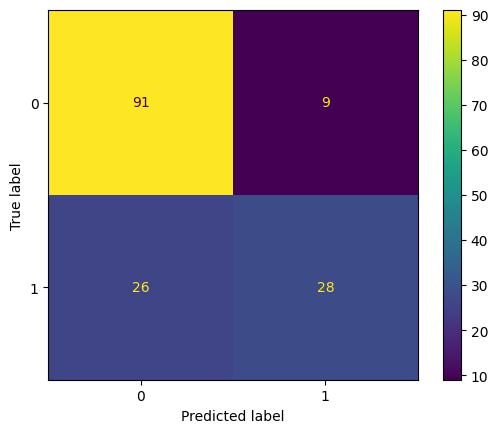

Classification Report :- 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



In [ ]:
print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, X_test_prediction)}\n")
cm = confusion_matrix(Y_test, X_test_prediction, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()
plt.show()
print(f"Classification Report :- \n {classification_report(Y_test, X_test_prediction)}")

Making a Predictive System

In [ ]:
input_data = (3,126,88,41,235,39.3,0.704,27)

#changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print("The person is not diabetic")
else:
  print("The person is diabetic")

[0]
The person is not diabetic


Saving the trained model

In [ ]:
import pickle

In [ ]:
filename  = 'diabetes_model.sav'
pickle.dump(classifier, open(filename,'wb'))

In [ ]:
# loading the saved model
diabetes_model = pickle.load(open('diabetes_model.sav','rb'))

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

#changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = diabetes_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print("The person is not diabetic")
else:
  print("The person is diabetic")

[1]
The person is diabetic
